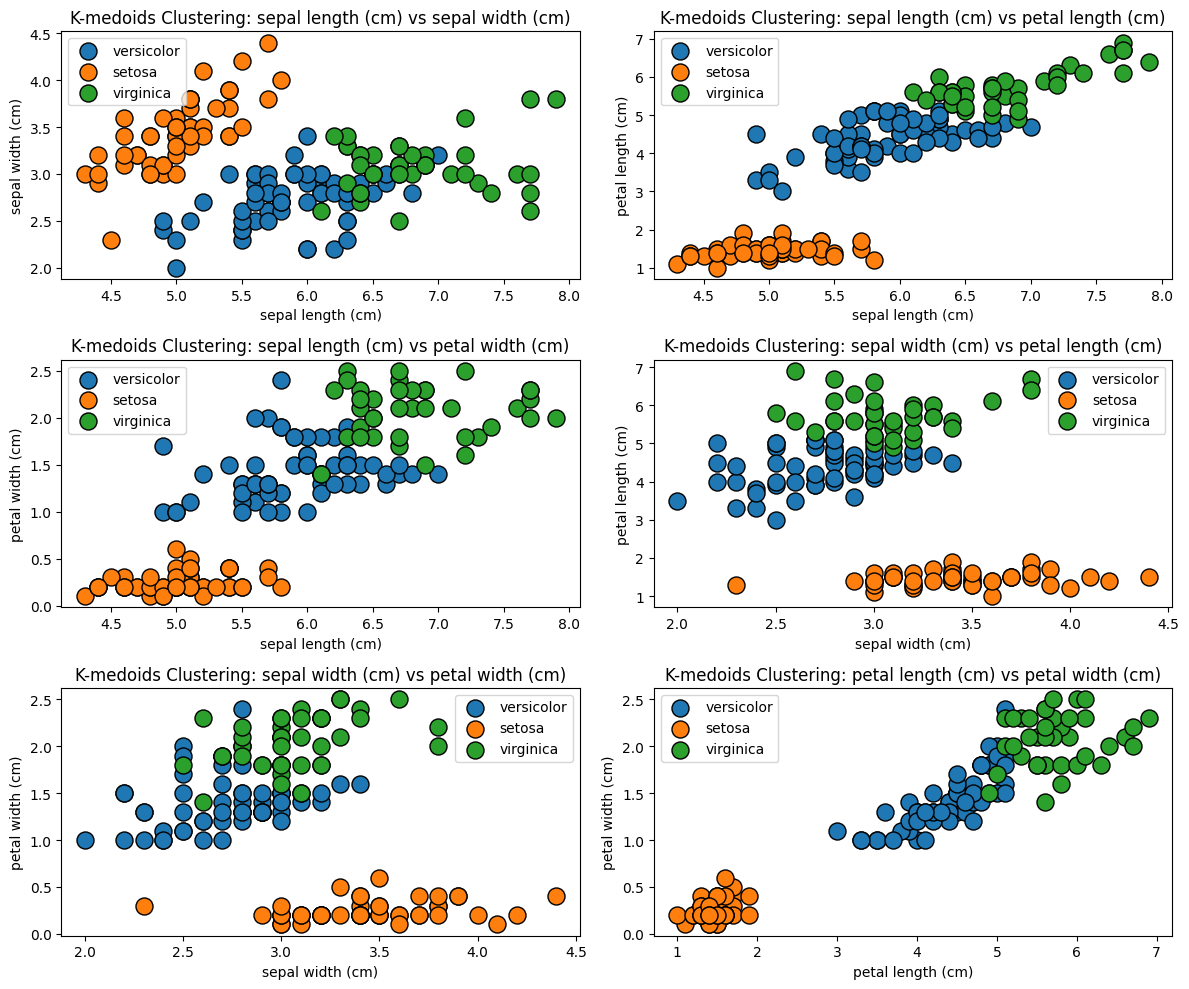

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from kmedoids import KMedoids

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Perform K-medoids Clustering
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
kmedoids.fit(X)
labels = kmedoids.labels_

# Step 3: Determine cluster to species mapping
cluster_species_mapping = {}
for cluster in np.unique(labels):
    cluster_species = np.bincount(y[labels == cluster]).argmax()
    cluster_species_mapping[cluster] = iris.target_names[cluster_species]

# Step 4: Visualize the Clusters using pairs of features with cluster names
feature_names = iris.feature_names

plt.figure(figsize=(12, 10))
plot_number = 1  # Initialize plot number
for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(3, 2, plot_number)
        for cluster in np.unique(labels):
            cluster_label = cluster_species_mapping[cluster]
            plt.scatter(X[labels == cluster, i], X[labels == cluster, j], label=cluster_label, edgecolor='k', s=150)
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        plt.title(f'K-medoids Clustering: {feature_names[i]} vs {feature_names[j]}')
        plot_number += 1  # Increment plot number


plt.tight_layout()
plt.show()
